<a href="https://colab.research.google.com/github/AndangSaefullah/Activity3/blob/master/UAS_SistemCerdas_PrediksiStroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/sample_data/new_dataset_stroke.csv', delimiter=";")
print(dataset.head())

   Patient ID  Age  Hypertension  Heart Disease  Average Glucose Level  \
0       18153   56             0              1                  13091   
1       62749   80             0              0                  18373   
2       32145   26             1              1                   1890   
3        6154   73             0              0                  18529   
4       48973   51             1              1                  17734   

   Body Mass Index (BMI)  Stroke History  Stress Levels  Diagnose  
0                   2237               0            348         1  
1                   3257               0            173         1  
2                   2032               0            731         1  
3                    275               0            535         0  
4                   2906               0            684         1  


In [ ]:
X = dataset.drop('Diagnose', axis=1)
y = dataset['Diagnose']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
10/10 [==============================] - 0s 20ms/step - loss: 0.4498 - accuracy: 0.8213 - val_loss: 0.8385 - val_accuracy: 0.4750
Epoch 2/50
10/10 [==============================] - 0s 18ms/step - loss: 0.4472 - accuracy: 0.8245 - val_loss: 0.8441 - val_accuracy: 0.4625
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 0.4434 - accuracy: 0.8401 - val_loss: 0.8462 - val_accuracy: 0.4625
Epoch 4/50
10/10 [==============================] - 0s 18ms/step - loss: 0.4403 - accuracy: 0.8307 - val_loss: 0.8508 - val_accuracy: 0.4750
Epoch 5/50
10/10 [==============================] - 0s 21ms/step - loss: 0.4358 - accuracy: 0.8307 - val_loss: 0.8522 - val_accuracy: 0.4625
Epoch 6/50
10/10 [==============================] - 0s 14ms/step - loss: 0.4323 - accuracy: 0.8370 - val_loss: 0.8596 - val_accuracy: 0.4625
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 0.4280 - accuracy: 0.8401 - val_loss: 0.8655 - val_accuracy: 0.4625
Epoch 8/50
10

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Menggunakan threshold 0.5
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAkurasi model: {accuracy * 100:.2f}%')

4/4 [==============================] - 0s 3ms/step

Akurasi model: 50.00%


In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[28 25]
 [25 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        53
           1       0.47      0.47      0.47        47

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.50      0.50      0.50       100



In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

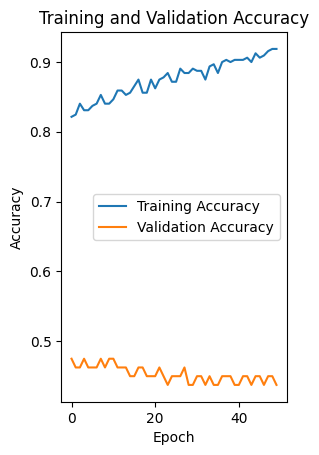

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

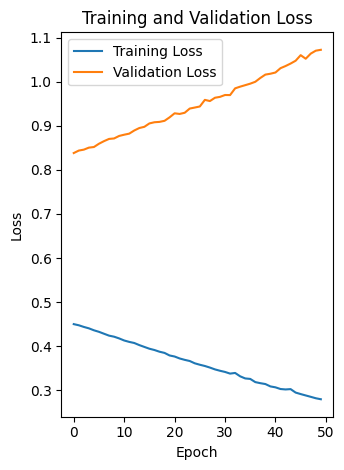

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()